In [246]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gamma
import random
import os

## Batch Size Profiling Plots - CC

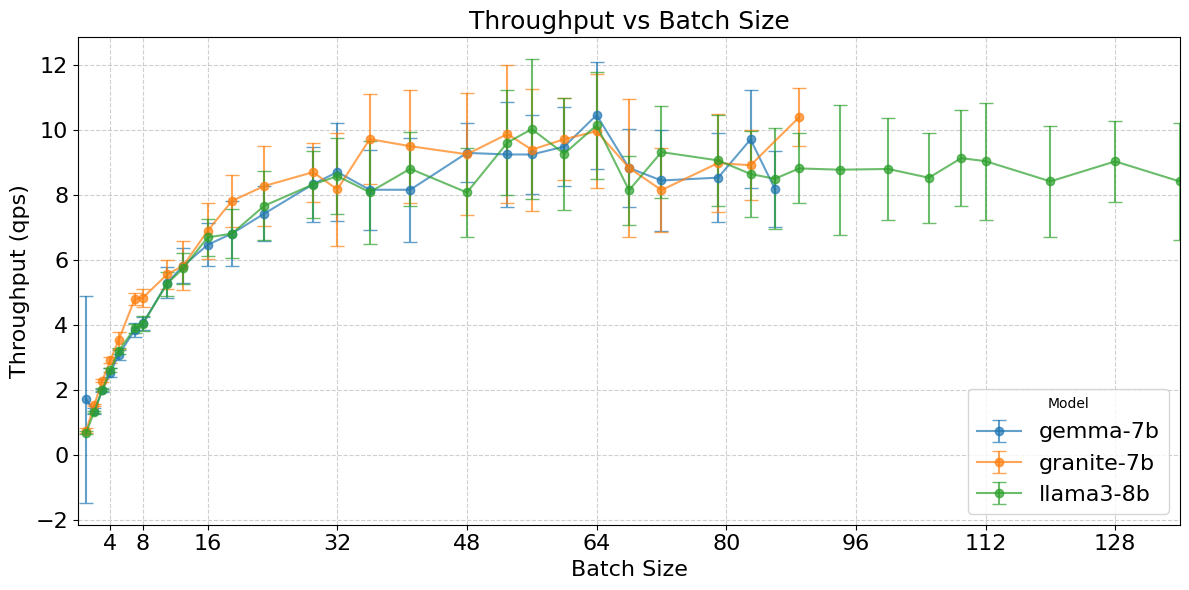

In [486]:
path = "profiling_results/"
# Results from two runs
filename1 = "batch_profiling_results_red_cuda_20240920_181007_ccmode.csv"
filename2 = "batch_profiling_results_red_cuda_20240924_181459_ccmode.csv"
df1 = pd.read_csv(path+filename1)
df2 = pd.read_csv(path+filename2)
df = pd.concat([df1,df2])

grouped_df = df.groupby(['model', 'batch_size']).mean().reset_index()
grouped_df.loc[:,"throughput_std"] = df.groupby(['model', 'batch_size']).std().reset_index()["throughput (qps)"]

fig, ax = plt.subplots(figsize = (12,6), nrows=1, ncols=1)

grouped = grouped_df.groupby('model')

# Plot for each model
for model, group in grouped:
    ax.errorbar(group['batch_size'], group['throughput (qps)'], yerr=group['throughput_std'], 
                 label=model, fmt='-o', capsize=5, alpha = 0.7)

# Set plot labels and title
ax.set_xlabel('Batch Size', fontsize = 16)
ax.set_ylabel('Throughput (qps)', fontsize = 16)
ax.set_title('Throughput vs Batch Size', fontsize = 18)
ax.legend(title='Model', loc="lower right", fontsize = 16)
ax.grid(linestyle = "--", alpha = 0.6)
ax.set_xlim(0,136)
ax.set_xticks(list(set([2**i for i in range(2,8)] + [16*i for i in range(3,8)])))
ax.tick_params(axis='both', which='major', labelsize=16)

fig.tight_layout()
fig.savefig('readme_media/throughput_vs_batch_size.png', dpi=300)


## Batch Size Profiling - Non CC

In [419]:
path = "profiling_results/"
# Results from two runs
filename1 = "batch_profiling_results_red_cuda_20241002_112126_noncc.csv"
df = pd.read_csv(path+filename1)
grouped_df = df.groupby(['model', 'batch_size']).mean().reset_index()

# grouped_df.loc[:,"processing_time_std"] = df.groupby(['model', 'batch_size']).std().reset_index()["processing time (s)"]
grouped_df.loc[:,"throughput_std"] = df.groupby(['model', 'batch_size']).std().reset_index()["throughput (qps)"]

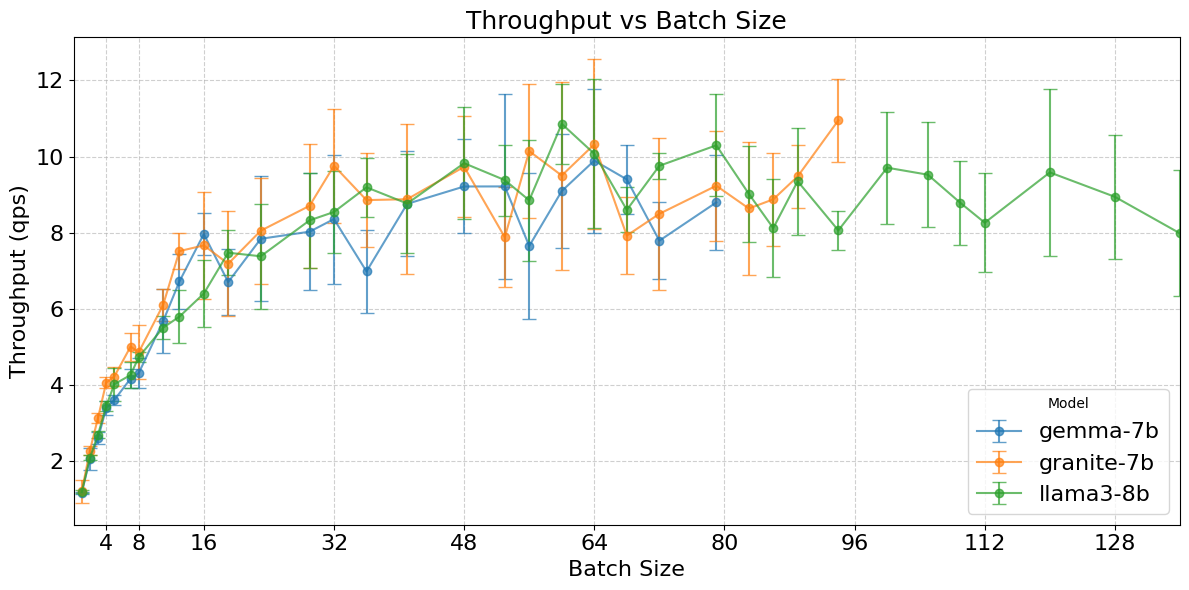

In [420]:
fig, ax = plt.subplots(figsize = (12,6), nrows=1, ncols=1)

# Plot for each model
for model, group in grouped_df.groupby('model'):
    ax.errorbar(group['batch_size'], group['throughput (qps)'], yerr=group['throughput_std'], 
                 label=model, fmt='-o', capsize=5, alpha = 0.7)

# Set plot labels and title
ax.set_xlabel('Batch Size', fontsize = 16)
ax.set_ylabel('Throughput (qps)', fontsize = 16)
ax.set_title('Throughput vs Batch Size', fontsize = 18)
ax.legend(title='Model', loc="lower right", fontsize = 16)
ax.grid(linestyle = "--", alpha = 0.6)
ax.set_xlim(0,136)
ax.set_xticks(list(set([2**i for i in range(2,8)] + [16*i for i in range(3,8)])))
ax.tick_params(axis='both', which='major', labelsize=16)

fig.tight_layout()
#fig.savefig('readme_media/throughput_vs_batch_size_noncc.png', dpi=300)

## Model loading times

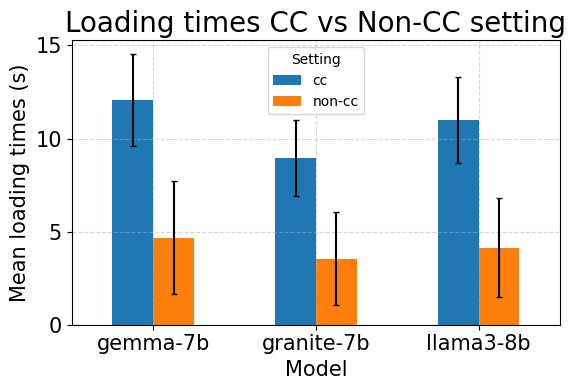

In [545]:
path = "profiling_results/"

filename_cc = "model_loading_times_red_cuda_20240906_120028_cc.csv"
df_cc = pd.read_csv(path+filename_cc)
df_cc["setting"] = "cc"

filename_noncc = "model_loading_times_red_cuda_20241002_105724_noncc.csv"
df_noncc = pd.read_csv(path+filename_noncc)
df_noncc["setting"] = "non-cc"

df_setting=pd.concat([df_cc, df_noncc])

fig, ax = plt.subplots(figsize=(6, 4), nrows=1, ncols=1)

df_setting_pivot = df_setting.pivot_table(values='mean_loading_time /s', index = "model_name", columns="setting")
df_setting_std_pivot = df_setting.pivot(index='model_name', columns='setting', values='std_loading_time /s')

df_setting_pivot.plot(kind='bar', yerr=df_setting_std_pivot, ax=ax, legend=True, capsize=2)
ax.set_title("Loading times CC vs Non-CC setting", fontsize = 20)
ax.set_xlabel('Model', fontsize = 15)
ax.set_ylabel('Mean loading times (s)', fontsize = 15)
ax.tick_params(axis='both', rotation=0, labelsize=15)
ax.legend(title='Setting', fontsize=10)
ax.grid(alpha=0.5, linestyle="--")

fig.tight_layout()
fig.savefig('readme_media/loading_times.png', dpi=300)

## Processing times

In [492]:
path = "profiling_results/"
# Results from two runs
filename1_noncc = "batch_profiling_results_red_cuda_20241002_112126_noncc.csv"
df_noncc = pd.read_csv(path+filename1_noncc)
grouped_df_noncc = df_noncc.groupby(['model', 'batch_size']).mean().reset_index()

filename1_cc = "batch_profiling_results_red_cuda_20240920_181007_ccmode.csv"
filename2_cc = "batch_profiling_results_red_cuda_20240924_181459_ccmode.csv"
df1_cc = pd.read_csv(path+filename1_cc)
df2_cc = pd.read_csv(path+filename2_cc)
df_cc = pd.concat([df1_cc,df2_cc])

grouped_df_cc = df_cc.groupby(['model', 'batch_size']).mean().reset_index()
grouped_df_noncc = df_noncc.groupby(['model', 'batch_size']).mean().reset_index()

grouped_df_cc.loc[:,"processing_time_std"] = df.groupby(['batch_size'])["processing time (s)"].std().reset_index()["processing time (s)"]
grouped_df_noncc.loc[:,"processing_time_std"] = df.groupby(['batch_size'])["processing time (s)"].std().reset_index()["processing time (s)"]

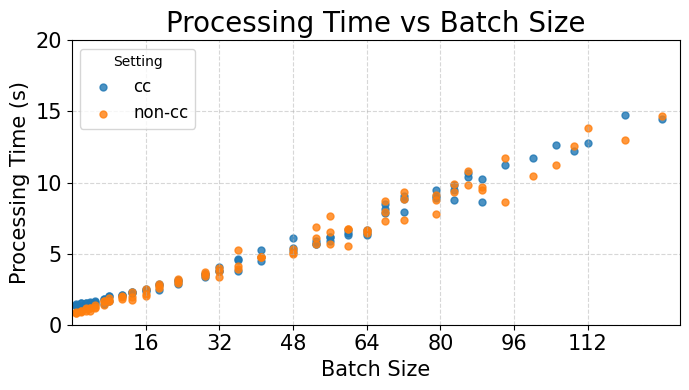

In [546]:
fig, ax = plt.subplots(figsize=(7, 4), nrows=1, ncols=1)

ax.scatter(grouped_df_cc["batch_size"], grouped_df_cc["processing time (s)"], marker="o", label = "cc", alpha=0.8, s=25)
ax.scatter(grouped_df_noncc["batch_size"], grouped_df_noncc["processing time (s)"], marker="o", label = "non-cc", alpha=0.8, s=25)


# Optionally, you can add labels and a title
ax.set_xlabel("Batch Size", fontsize = 15)
ax.set_ylabel("Processing Time (s)", fontsize = 15)
ax.set_title("Processing Time vs Batch Size", fontsize = 20)
ax.legend(title='Setting', fontsize=12, loc="upper left")
ax.grid(alpha=0.5, linestyle="--")
ax.set_xlim(0,132)
ax.set_ylim(0,20)
ax.set_xticks(list(set([16*i for i in range(1,8)])))
ax.tick_params(axis='both', which='major', labelsize=15)

fig.tight_layout()
fig.savefig('readme_media/processing_time_vs_batch_size.png', dpi=300)

## Input Patterns

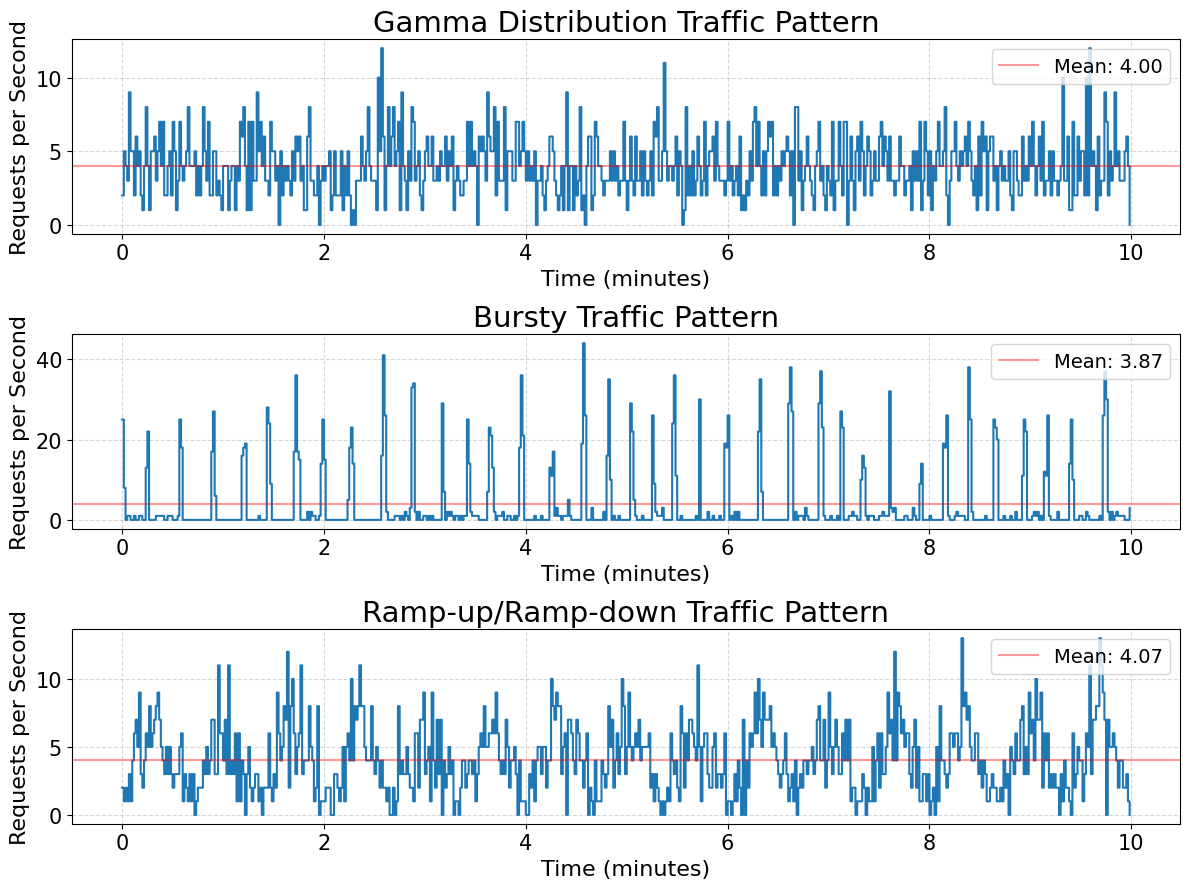

In [406]:
fig, ax = plt.subplots(figsize=(12, 9), nrows=3, ncols=1, sharey=False)

np.random.seed(42)
random.seed(42)

# Plot 1: Gamma Distribution Traffic Pattern
run_duration = 10 * 60  # Total time in seconds (e.g., 10 minutes)
rate = 4                # Average rate (requests per second)
shape = 1.0             # Shape parameter (alpha)
scale = 1 / rate        # Scale parameter (theta)

# Create time bins (e.g., per second)
time_bins = np.arange(0, run_duration + 1)
# Convert time bins to minutes for the x-axis
time_bins_minutes = time_bins / 60

# Generate inter-arrival times using Gamma distribution
inter_arrival_times = np.random.gamma(shape, scale, size=int(run_duration * rate))
arrival_times = np.cumsum(inter_arrival_times)
arrival_times = arrival_times[arrival_times <= run_duration]
request_counts, _ = np.histogram(arrival_times, bins=time_bins)
# Plot Gamma Distribution
gamma_mean = np.mean(request_counts)
ax[0].step(time_bins_minutes[:-1], request_counts, where='post')
ax[0].axhline(gamma_mean, color='r', linestyle='-', label=f'Mean: {gamma_mean:.2f}', alpha = 0.4)
ax[0].set_title('Gamma Distribution Traffic Pattern', fontsize=21)
ax[0].set_xlabel('Time (minutes)', fontsize = 16)
ax[0].set_ylabel('Requests per Second', fontsize = 16)
ax[0].grid(True, linestyle="--", alpha=0.5)
ax[0].legend(loc="upper right", fontsize=14)
ax[0].tick_params(axis='both', which='major', labelsize=15)

# Plot 2: Bursty Traffic Pattern (Updated)
arrival_times = []
current_time = 0
while current_time < run_duration:
    burst_duration = np.random.uniform(1, 3)
    burst_rate = np.random.uniform(20, 35)
    num_requests = int(burst_duration * burst_rate)
    inter_arrival_times = np.random.exponential(1 / burst_rate, size=num_requests) 
    if inter_arrival_times.size > 0:
        cumulative_times = current_time + np.cumsum(inter_arrival_times)
        arrival_times.extend(cumulative_times[cumulative_times <= current_time + burst_duration])
    current_time += burst_duration   
    idle_duration = np.random.uniform(10, 18)
    idle_rate = np.random.uniform(0, 1)
    num_requests = int(idle_duration * idle_rate)
    inter_arrival_times = np.random.exponential(1 / idle_rate, size=num_requests) if idle_rate > 0 else []
    if inter_arrival_times.size > 0:
        cumulative_times = current_time + np.cumsum(inter_arrival_times)
        arrival_times.extend(cumulative_times[cumulative_times <= current_time + idle_duration])   
    current_time += idle_duration
arrival_times = np.array(arrival_times)
request_counts, _ = np.histogram(arrival_times, bins=time_bins)
# Plot Bursty Traffic
bursty_mean = np.mean(request_counts)
ax[1].step(time_bins_minutes[:-1], request_counts, where='post')
ax[1].axhline(bursty_mean, color='r', linestyle='-', label=f'Mean: {bursty_mean:.2f}', alpha = 0.4)
ax[1].set_title('Bursty Traffic Pattern', fontsize = 21)
ax[1].set_xlabel('Time (minutes)', fontsize = 16)
ax[1].set_ylabel('Requests per Second', fontsize = 16)
ax[1].grid(True, linestyle="--", alpha=0.5)
ax[1].legend(loc="upper right", fontsize = 14)
ax[1].tick_params(axis='both', which='major', labelsize=15)


# Plot 3: Repeating Ramp-up/Ramp-down Traffic Pattern
min_rate = 1
max_rate = 7
ramp_up_duration = 20
ramp_down_duration = 20
cycle_duration = ramp_up_duration + ramp_down_duration
arrival_times = []
current_time = 0
while current_time < run_duration:
    time_in_cycle = (current_time % cycle_duration)
    if time_in_cycle < ramp_up_duration:
        current_rate = min_rate + (max_rate - min_rate) * (time_in_cycle / ramp_up_duration)
    else:
        time_in_ramp_down = time_in_cycle - ramp_up_duration
        current_rate = max_rate - (max_rate - min_rate) * (time_in_ramp_down / ramp_down_duration) 
    inter_arrival_time = np.random.exponential(1 / current_rate)
    current_time += inter_arrival_time
    if current_time <= run_duration:
        arrival_times.append(current_time)
arrival_times = np.array(arrival_times)
request_counts, _ = np.histogram(arrival_times, bins=time_bins)
# Plot Ramp-up/Ramp-down Traffic
ramp_mean = np.mean(request_counts)
ax[2].step(time_bins_minutes[:-1], request_counts, where='post')
ax[2].axhline(ramp_mean, color='r', linestyle='-', label=f'Mean: {ramp_mean:.2f}', alpha = 0.4)
ax[2].set_title('Ramp-up/Ramp-down Traffic Pattern', fontsize=21)
ax[2].set_xlabel('Time (minutes)', fontsize = 16)
ax[2].set_ylabel('Requests per Second', fontsize = 16)
ax[2].grid(True, linestyle="--", alpha=0.5)
ax[2].legend(loc="upper right", fontsize=14)
ax[2].tick_params(axis='both', which='major', labelsize=15)

plt.tight_layout()
plt.savefig('readme_media/input_patterns.png', dpi=300)
plt.show()


## Results analysis - CC

In [421]:
import os
import re
import pandas as pd

# Function to parse filename and extract relevant information
def parse_filename(filename):
    # Modify the regex pattern to allow for multiple '+' signs in the strategy
    pattern = re.compile(r".*_(\w+)_([A-Za-z]+)_([A-Za-z\+\+]+)_(ramp|bursty|gamma)_mean(\d+)_\d+_sla(\d+)_\d+_\d+")
    match = pattern.match(filename)
    
    if match:
        machine = match.group(1)
        device = match.group(2)
        strategy = match.group(3) 
        pattern_type = match.group(4)
        input_mean = int(match.group(5))
        time_limit = int(match.group(6))
        # print(machine)
        # print(device)
        # print(strategy)
        # print(pattern_type)
        # print(input_mean)
        # print(time_limit)
        return machine, device, strategy, pattern_type, input_mean, time_limit
    else:
        return None

# Function to parse the log file and extract the relevant information
def extract_log_info(log_file_path):
    switch_count = None
    total_time = None
    total_inference_time = None
    inference_percentage = None
    
    with open(log_file_path, 'r') as file:
        lines = file.readlines()
        
        end_found = False
        for i in range(len(lines) - 1, -1, -1):
            line = lines[i].strip()
            #print(f"Processing line: {line}")  # Print the current line for debugging
            
            # Check if we found "END", start reading the lines we need after this
            if "END" in line and not end_found:
                #print("END FOUND, start reading times and switch count")
                end_found = True
                continue
            
            if end_found:
                # Check for SWITCH COUNT
                if "SWITCH COUNT" in line and switch_count is None:
                    #print("SWITCH COUNT FOUND")
                    match = re.search(r'SWITCH COUNT: (\d+)', line)
                    if match:
                        switch_count = int(match.group(1))
                        #print(f"Switch count: {switch_count}")
                
                # Check for Total time
                elif "Total time" in line and total_time is None:
                    #print("TOTAL TIME FOUND")
                    match = re.search(r'Total time:\s*([\d\.]+)\s*seconds', line)
                    if match:
                        total_time = float(match.group(1))
                        #print(f"Total time: {total_time}")
                
                # Check for Total inference time
                elif "Total inference time" in line and total_inference_time is None:
                    #print("TOTAL INFERENCE TIME FOUND")
                    match = re.search(r'Total inference time:\s*([\d\.]+)\s*seconds', line)
                    if match:
                        total_inference_time = float(match.group(1))
                        #print(f"Total inference time: {total_inference_time}")
                
                # Check for Inference percentage
                elif "Inference time as percentage of total time" in line and inference_percentage is None:
                    #print("INFERENCE PERCENTAGE FOUND")
                    match = re.search(r'Inference time as percentage of total time:\s*([\d\.]+)%', line)
                    if match:
                        inference_percentage = float(match.group(1))
                        #print(f"Inference time percentage: {inference_percentage}")

                # After reading all required fields, we can stop
                if switch_count is not None and total_time is not None and total_inference_time is not None and inference_percentage is not None:
                    #print("All required data found, stopping.")
                    break

    return switch_count, total_time, total_inference_time, inference_percentage


In [549]:

# Dictionary to store dataframes
dataframes = {}

# Folder paths for the CSVs and log files
csv_folder = 'outputs_cc'
log_folder = 'logs_cc'

# Iterate over each CSV file in the folder
for filename in os.listdir(csv_folder):
    if filename.endswith('.csv'):
        # Parse the CSV file
        file_path = os.path.join(csv_folder, filename)
        df = pd.read_csv(file_path)
        
        # Parse machine, device, strategy, pattern, input mean, and time limit from the filename
        machine, device, strategy, pattern_type, input_mean, time_limit = parse_filename(filename)

        # Add the filename metadata to the dataframe
        df['machine'] = machine
        df['device'] = device
        df['strategy'] = strategy
        df['pattern'] = pattern_type
        df['input_mean'] = input_mean
        df['time_limit'] = time_limit

        # Modify the log filename by replacing the prefix
        csv_prefix = 'measurements_results_'
        log_prefix = 'batch_processing_debug_'

        # Construct the corresponding log file path by replacing the prefix and extension
        log_file_path = os.path.join(log_folder, filename.replace(csv_prefix, log_prefix).replace('.csv', '.log'))

        # Check if the corresponding log file exists
        if os.path.exists(log_file_path):
            #print("LOG FOUND")
            # Extract log data from the log file
            switch_count, total_time, total_inference_time, inference_percentage = extract_log_info(log_file_path)

            # Add the extracted log information to the dataframe
            df['switch_count'] = switch_count
            df['total_time'] = total_time
            df['total_inference_time'] = total_inference_time
            df['inference_percentage'] = inference_percentage
            df["overall_throughput"] = df.shape[0]/total_time
            df["inference throughput"] = df.shape[0]/total_inference_time
            df["SLO attainment"] = round(sum(df["latency (s)"]<time_limit)/df.shape[0]*100,2)
        
        # Store the dataframe in the dictionary using the filename as key
        dataframes[filename[:-4]] = df

# Combine all dataframes into a single one
combined_df_cc = pd.concat(dataframes.values())
combined_df_cc["setting"] = "cc"

In [550]:
combined_df_cc.head(3)

,request_id,arrival time,timestamp,model,batch_size,latency (s),processing time (s),throughput (qps),cpu/interrupts/ctx_switches_count,cpu/interrupts/interrupts_count,...,input_mean,time_limit,switch_count,total_time,total_inference_time,inference_percentage,overall_throughput,inference throughput,SLO attainment,setting
0,c61da18e,2024-09-26 20:08:35,2024-09-26 20:09:31,gemma-7b,42,56.604,6.443,6.519,30438,251876,...,4,60,41,1185.8231,261.688,22.07,2.094748,9.49222,40.14,cc
1,6df427fd,2024-09-26 20:08:35,2024-09-26 20:09:31,gemma-7b,42,56.367,6.443,6.519,30438,251876,...,4,60,41,1185.8231,261.688,22.07,2.094748,9.49222,40.14,cc
2,ecf73283,2024-09-26 20:08:35,2024-09-26 20:09:31,gemma-7b,42,56.361,6.443,6.519,30438,251876,...,4,60,41,1185.8231,261.688,22.07,2.094748,9.49222,40.14,cc


In [390]:
#combined_df.to_csv("results/measurements_results_red_cuda_ccmode_combined.csv", index=False)

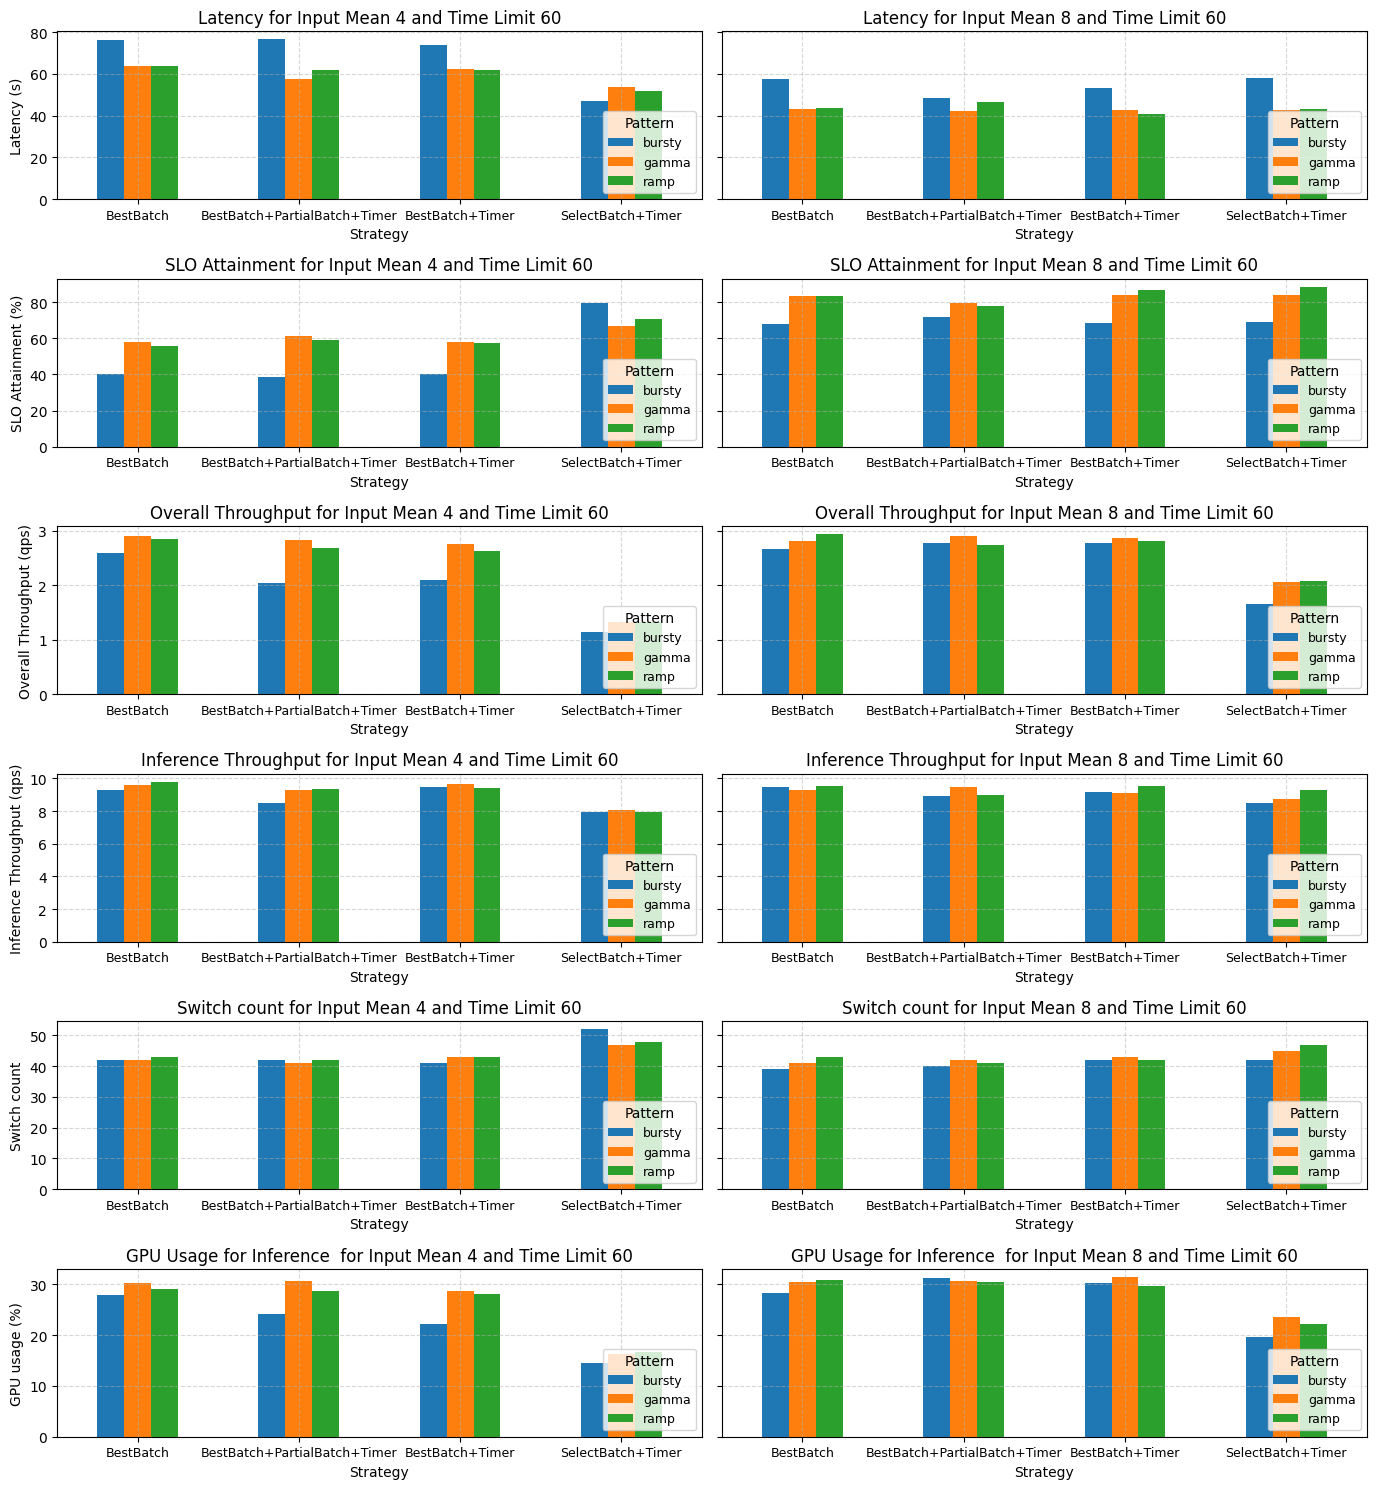

In [408]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(14, 15), nrows=6, ncols=2, sharey='row') 

# Create plots for each combination of input mean and time limit
for i, ((input_mean, time_limit), group) in enumerate(combined_df_cc.groupby(['input_mean', 'time_limit'])):
    
    col = i % 2   # Determine the column index (either 0 or 1)
    
    # Pivot the data to have strategies and patterns side by side for Latency
    latency_pivot_data = group.pivot_table(values='latency (s)', index='strategy', columns='pattern', aggfunc='mean')
    latency_pivot_data.plot(kind='bar', ax=ax[0, col], legend=True)
    ax[0, col].set_title(f'Latency for Input Mean {input_mean} and Time Limit {time_limit}')
    ax[0, col].set_xlabel('Strategy')
    ax[0, col].set_ylabel('Latency (s)')
    ax[0, col].tick_params(axis='x', rotation=0, labelsize=9)
    ax[0, col].legend(title='Pattern', loc="lower right", fontsize=9)
    ax[0, col].grid(alpha=0.5, linestyle="--")


    # Plot SLO attainment
    slo_attainment_pivot_data = group.pivot_table(values='SLO attainment', index='strategy', columns='pattern', aggfunc='mean')
    slo_attainment_pivot_data.plot(kind='bar', ax=ax[1, col], legend=True)
    ax[1, col].set_title(f'SLO Attainment for Input Mean {input_mean} and Time Limit {time_limit}')
    ax[1, col].set_xlabel('Pattern')
    ax[1, col].set_ylabel('SLO Attainment (%)')
    ax[1, col].tick_params(axis='x', rotation=0, labelsize=9)
    ax[1, col].legend(title='Pattern', loc="lower right", fontsize=9)
    ax[1, col].grid(alpha=0.5, linestyle="--")

    # Plot overall throughput
    overall_throughput_pivot_data = group.pivot_table(values='overall_throughput', index='strategy', columns='pattern', aggfunc='mean')
    overall_throughput_pivot_data.plot(kind='bar', ax=ax[2, col], legend=True)
    ax[2, col].set_title(f'Overall Throughput for Input Mean {input_mean} and Time Limit {time_limit}')
    ax[2, col].set_xlabel('Strategy')
    ax[2, col].set_ylabel('Overall Throughput (qps)')
    ax[2, col].tick_params(axis='x', rotation=0, labelsize=9)
    ax[2, col].legend(title='Pattern', loc="lower right", fontsize=9)
    ax[2, col].grid(alpha=0.5, linestyle="--")

    # Plot inference throughput
    inference_throughput_pivot_data = group.pivot_table(values='inference throughput', index='strategy', columns='pattern', aggfunc='mean')
    inference_throughput_pivot_data.plot(kind='bar', ax=ax[3, col], legend=True)
    ax[3, col].set_title(f'Inference Throughput for Input Mean {input_mean} and Time Limit {time_limit}')
    ax[3, col].set_xlabel('Strategy')
    ax[3, col].set_ylabel('Inference Throughput (qps)')
    ax[3, col].tick_params(axis='x', rotation=0, labelsize=9)
    ax[3, col].legend(title='Pattern', loc="lower right", fontsize=9)
    ax[3, col].grid(alpha=0.5, linestyle="--")

    
    # Plot Switch count
    switch_count_pivot_data = group.pivot_table(values='switch_count', index='strategy', columns='pattern', aggfunc='mean')
    switch_count_pivot_data.plot(kind='bar', ax=ax[4, col], legend=True)
    ax[4, col].set_title(f'Switch count for Input Mean {input_mean} and Time Limit {time_limit}')
    ax[4, col].set_xlabel('Strategy')
    ax[4, col].set_ylabel('Switch count')
    ax[4, col].tick_params(axis='x', rotation=0, labelsize=9)
    ax[4, col].legend(title='Pattern', loc="lower right", fontsize=9)
    ax[4, col].grid(alpha=0.5, linestyle="--")


    # Plot Switch count
    utilization_pivot_data = group.pivot_table(values='inference_percentage', index='strategy', columns='pattern', aggfunc='mean')
    utilization_pivot_data.plot(kind='bar', ax=ax[5, col], legend=True)
    ax[5, col].set_title(f'GPU Usage for Inference  for Input Mean {input_mean} and Time Limit {time_limit}')
    ax[5, col].set_xlabel('Strategy')
    ax[5, col].set_ylabel('GPU usage (%)')
    ax[5, col].tick_params(axis='x', rotation=0, labelsize=9)
    ax[5, col].legend(title='Pattern', loc="lower right", fontsize=9)
    ax[5, col].grid(alpha=0.5, linestyle="--")

    # Stop if more than the number of available subplots
    if i >= 11:  # We only have space for 5 rows x 2 columns
        break

fig.tight_layout()
plt.show()

# ONLY KEEP SLO Attainment, Overall Throughput and GPU usage?

## Result analysis - Non CC

In [441]:
# Dictionary to store dataframes
dataframes = {}

# Folder paths for the CSVs and log files
csv_folder = 'outputs_noncc'
log_folder = 'logs_noncc'

# Iterate over each CSV file in the folder
for filename in os.listdir(csv_folder):
    if filename.endswith('.csv'):
        # Parse the CSV file
        file_path = os.path.join(csv_folder, filename)
        df = pd.read_csv(file_path)
        
        # Parse machine, device, strategy, pattern, input mean, and time limit from the filename
        machine, device, strategy, pattern_type, input_mean, time_limit = parse_filename(filename)

        # Add the filename metadata to the dataframe
        df['machine'] = machine
        df['device'] = device
        df['strategy'] = strategy
        df['pattern'] = pattern_type
        df['input_mean'] = input_mean
        df['time_limit'] = time_limit

        # Modify the log filename by replacing the prefix
        csv_prefix = 'measurements_results_'
        log_prefix = 'batch_processing_debug_'

        # Construct the corresponding log file path by replacing the prefix and extension
        log_file_path = os.path.join(log_folder, filename.replace(csv_prefix, log_prefix).replace('.csv', '.log'))

        # Check if the corresponding log file exists
        if os.path.exists(log_file_path):
            #print("LOG FOUND")
            # Extract log data from the log file
            switch_count, total_time, total_inference_time, inference_percentage = extract_log_info(log_file_path)

            # Add the extracted log information to the dataframe
            df['switch_count'] = switch_count
            df['total_time'] = total_time
            df['total_inference_time'] = total_inference_time
            df['inference_percentage'] = inference_percentage
            df["overall_throughput"] = df.shape[0]/total_time
            df["inference throughput"] = df.shape[0]/total_inference_time
            df["SLO attainment"] = round(sum(df["latency (s)"]<time_limit)/df.shape[0]*100,2)
        
        # Store the dataframe in the dictionary using the filename as key
        dataframes[filename[:-4]] = df

# Combine all dataframes into a single one
combined_df_noncc = pd.concat(dataframes.values())
combined_df_noncc["setting"] = "non-cc"

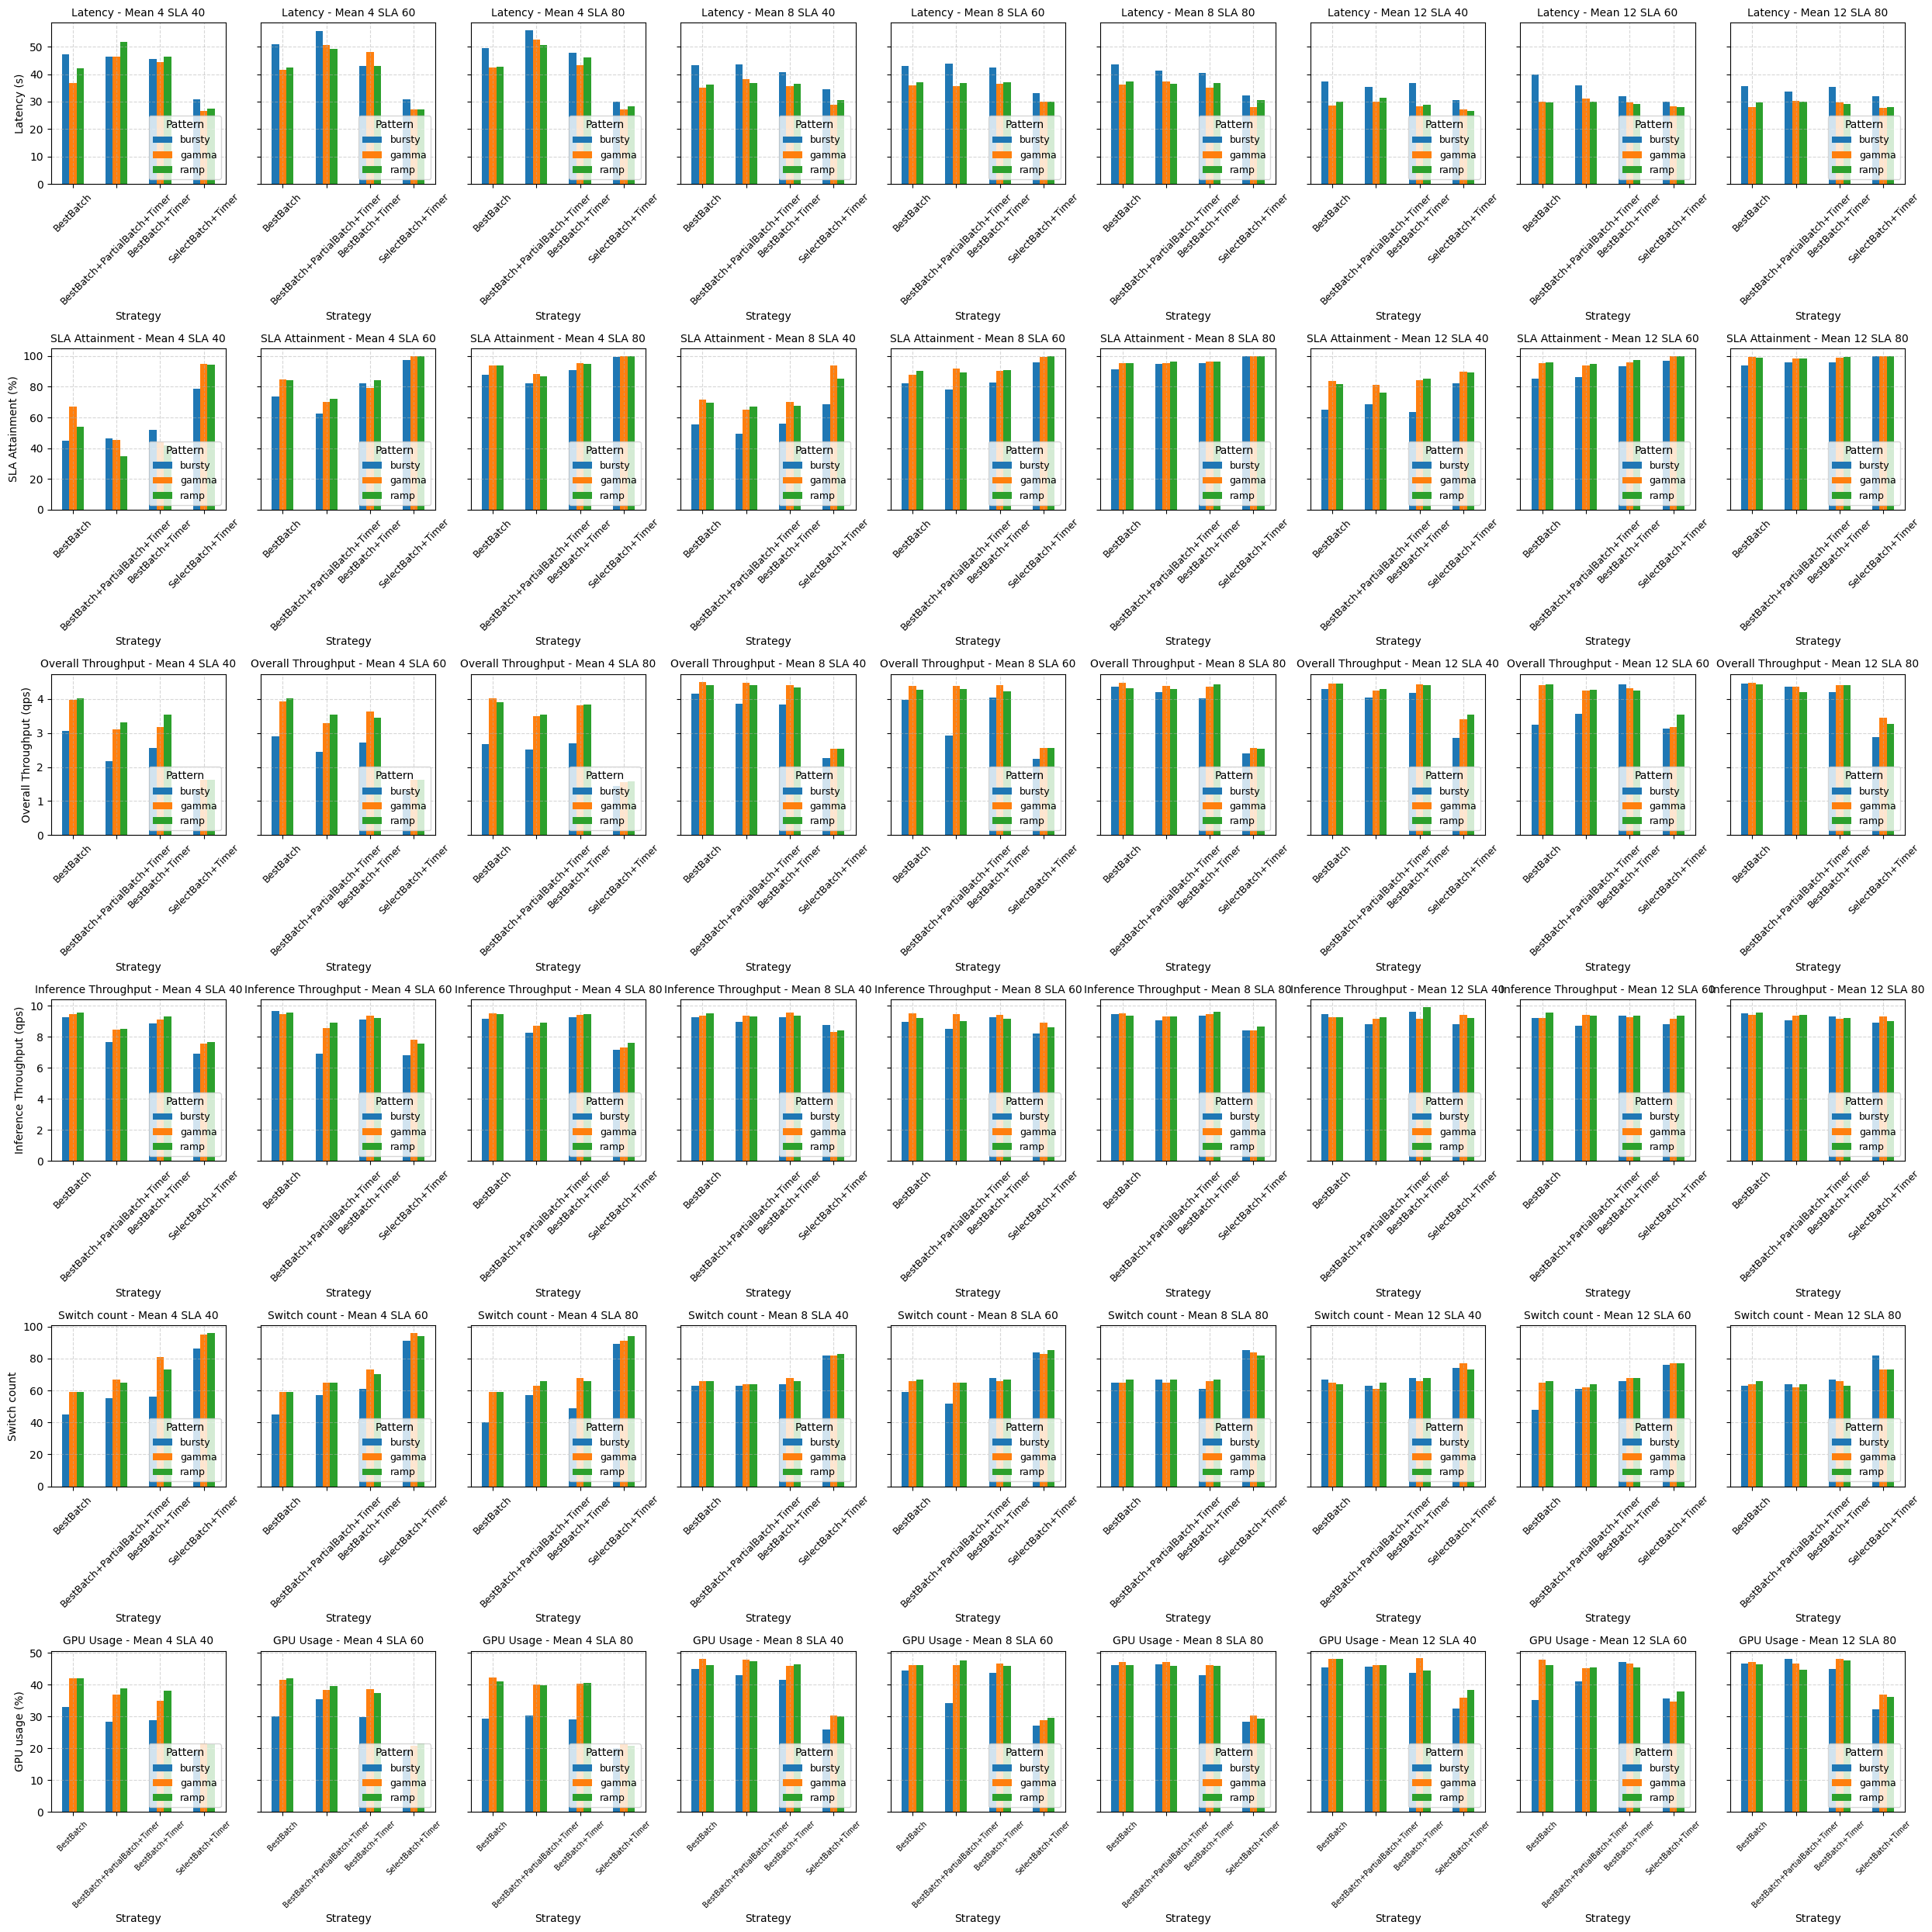

In [448]:
fig, ax = plt.subplots(figsize=(25, 25), nrows=6, ncols=9, sharey='row') 

# Create plots for each combination of input mean and time limit
for i, ((input_mean, time_limit), group) in enumerate(combined_df_noncc.groupby(['input_mean', 'time_limit'])):
    
    col = i % 9   # Determine the column index (either 0 or 1)
    
    # Pivot the data to have strategies and patterns side by side for Latency
    latency_pivot_data = group.pivot_table(values='latency (s)', index='strategy', columns='pattern', aggfunc='mean')
    latency_pivot_data.plot(kind='bar', ax=ax[0, col], legend=True)
    ax[0, col].set_title(f'Latency - Mean {input_mean} SLA {time_limit}', fontsize = 10)
    ax[0, col].set_xlabel('Strategy')
    ax[0, col].set_ylabel('Latency (s)')
    ax[0, col].tick_params(axis='x', rotation=45, labelsize=9)
    ax[0, col].legend(title='Pattern', loc="lower right", fontsize=9)
    ax[0, col].grid(alpha=0.5, linestyle="--")


    # Plot SLO attainment
    slo_attainment_pivot_data = group.pivot_table(values='SLO attainment', index='strategy', columns='pattern', aggfunc='mean')
    slo_attainment_pivot_data.plot(kind='bar', ax=ax[1, col], legend=True)
    ax[1, col].set_title(f'SLA Attainment - Mean {input_mean} SLA {time_limit}', fontsize = 10)
    ax[1, col].set_xlabel('Strategy')
    ax[1, col].set_ylabel('SLA Attainment (%)')
    ax[1, col].tick_params(axis='x', rotation=45, labelsize=9)
    ax[1, col].legend(title='Pattern', loc="lower right", fontsize=9)
    ax[1, col].grid(alpha=0.5, linestyle="--")

    # Plot overall throughput
    overall_throughput_pivot_data = group.pivot_table(values='overall_throughput', index='strategy', columns='pattern', aggfunc='mean')
    overall_throughput_pivot_data.plot(kind='bar', ax=ax[2, col], legend=True)
    ax[2, col].set_title(f'Overall Throughput - Mean {input_mean} SLA {time_limit}', fontsize = 10)
    ax[2, col].set_xlabel('Strategy')
    ax[2, col].set_ylabel('Overall Throughput (qps)')
    ax[2, col].tick_params(axis='x', rotation=45, labelsize=9)
    ax[2, col].legend(title='Pattern', loc="lower right", fontsize=9)
    ax[2, col].grid(alpha=0.5, linestyle="--")

    # Plot inference throughput
    inference_throughput_pivot_data = group.pivot_table(values='inference throughput', index='strategy', columns='pattern', aggfunc='mean')
    inference_throughput_pivot_data.plot(kind='bar', ax=ax[3, col], legend=True)
    ax[3, col].set_title(f'Inference Throughput - Mean {input_mean} SLA {time_limit}', fontsize = 10)
    ax[3, col].set_xlabel('Strategy')
    ax[3, col].set_ylabel('Inference Throughput (qps)')
    ax[3, col].tick_params(axis='x', rotation=45, labelsize=9)
    ax[3, col].legend(title='Pattern', loc="lower right", fontsize=9)
    ax[3, col].grid(alpha=0.5, linestyle="--")

    
    # Plot Switch count
    switch_count_pivot_data = group.pivot_table(values='switch_count', index='strategy', columns='pattern', aggfunc='mean')
    switch_count_pivot_data.plot(kind='bar', ax=ax[4, col], legend=True)
    ax[4, col].set_title(f'Switch count - Mean {input_mean} SLA {time_limit}', fontsize = 10)
    ax[4, col].set_xlabel('Strategy')
    ax[4, col].set_ylabel('Switch count')
    ax[4, col].tick_params(axis='x', rotation=45, labelsize=9)
    ax[4, col].legend(title='Pattern', loc="lower right", fontsize=9)
    ax[4, col].grid(alpha=0.5, linestyle="--")


    # Plot Switch count
    utilization_pivot_data = group.pivot_table(values='inference_percentage', index='strategy', columns='pattern', aggfunc='mean')
    utilization_pivot_data.plot(kind='bar', ax=ax[5, col], legend=True)
    ax[5, col].set_title(f'GPU Usage - Mean {input_mean} SLA {time_limit}', fontsize = 10)
    ax[5, col].set_xlabel('Strategy')
    ax[5, col].set_ylabel('GPU usage (%)')
    ax[5, col].tick_params(axis='x', rotation=45, labelsize=7)
    ax[5, col].legend(title='Pattern', loc="lower right", fontsize=9)
    ax[5, col].grid(alpha=0.5, linestyle="--")

    # Stop if more than the number of available subplots
    if i >= 15:  # We only have space for 5 rows x 2 columns
        break

fig.tight_layout()
plt.show()

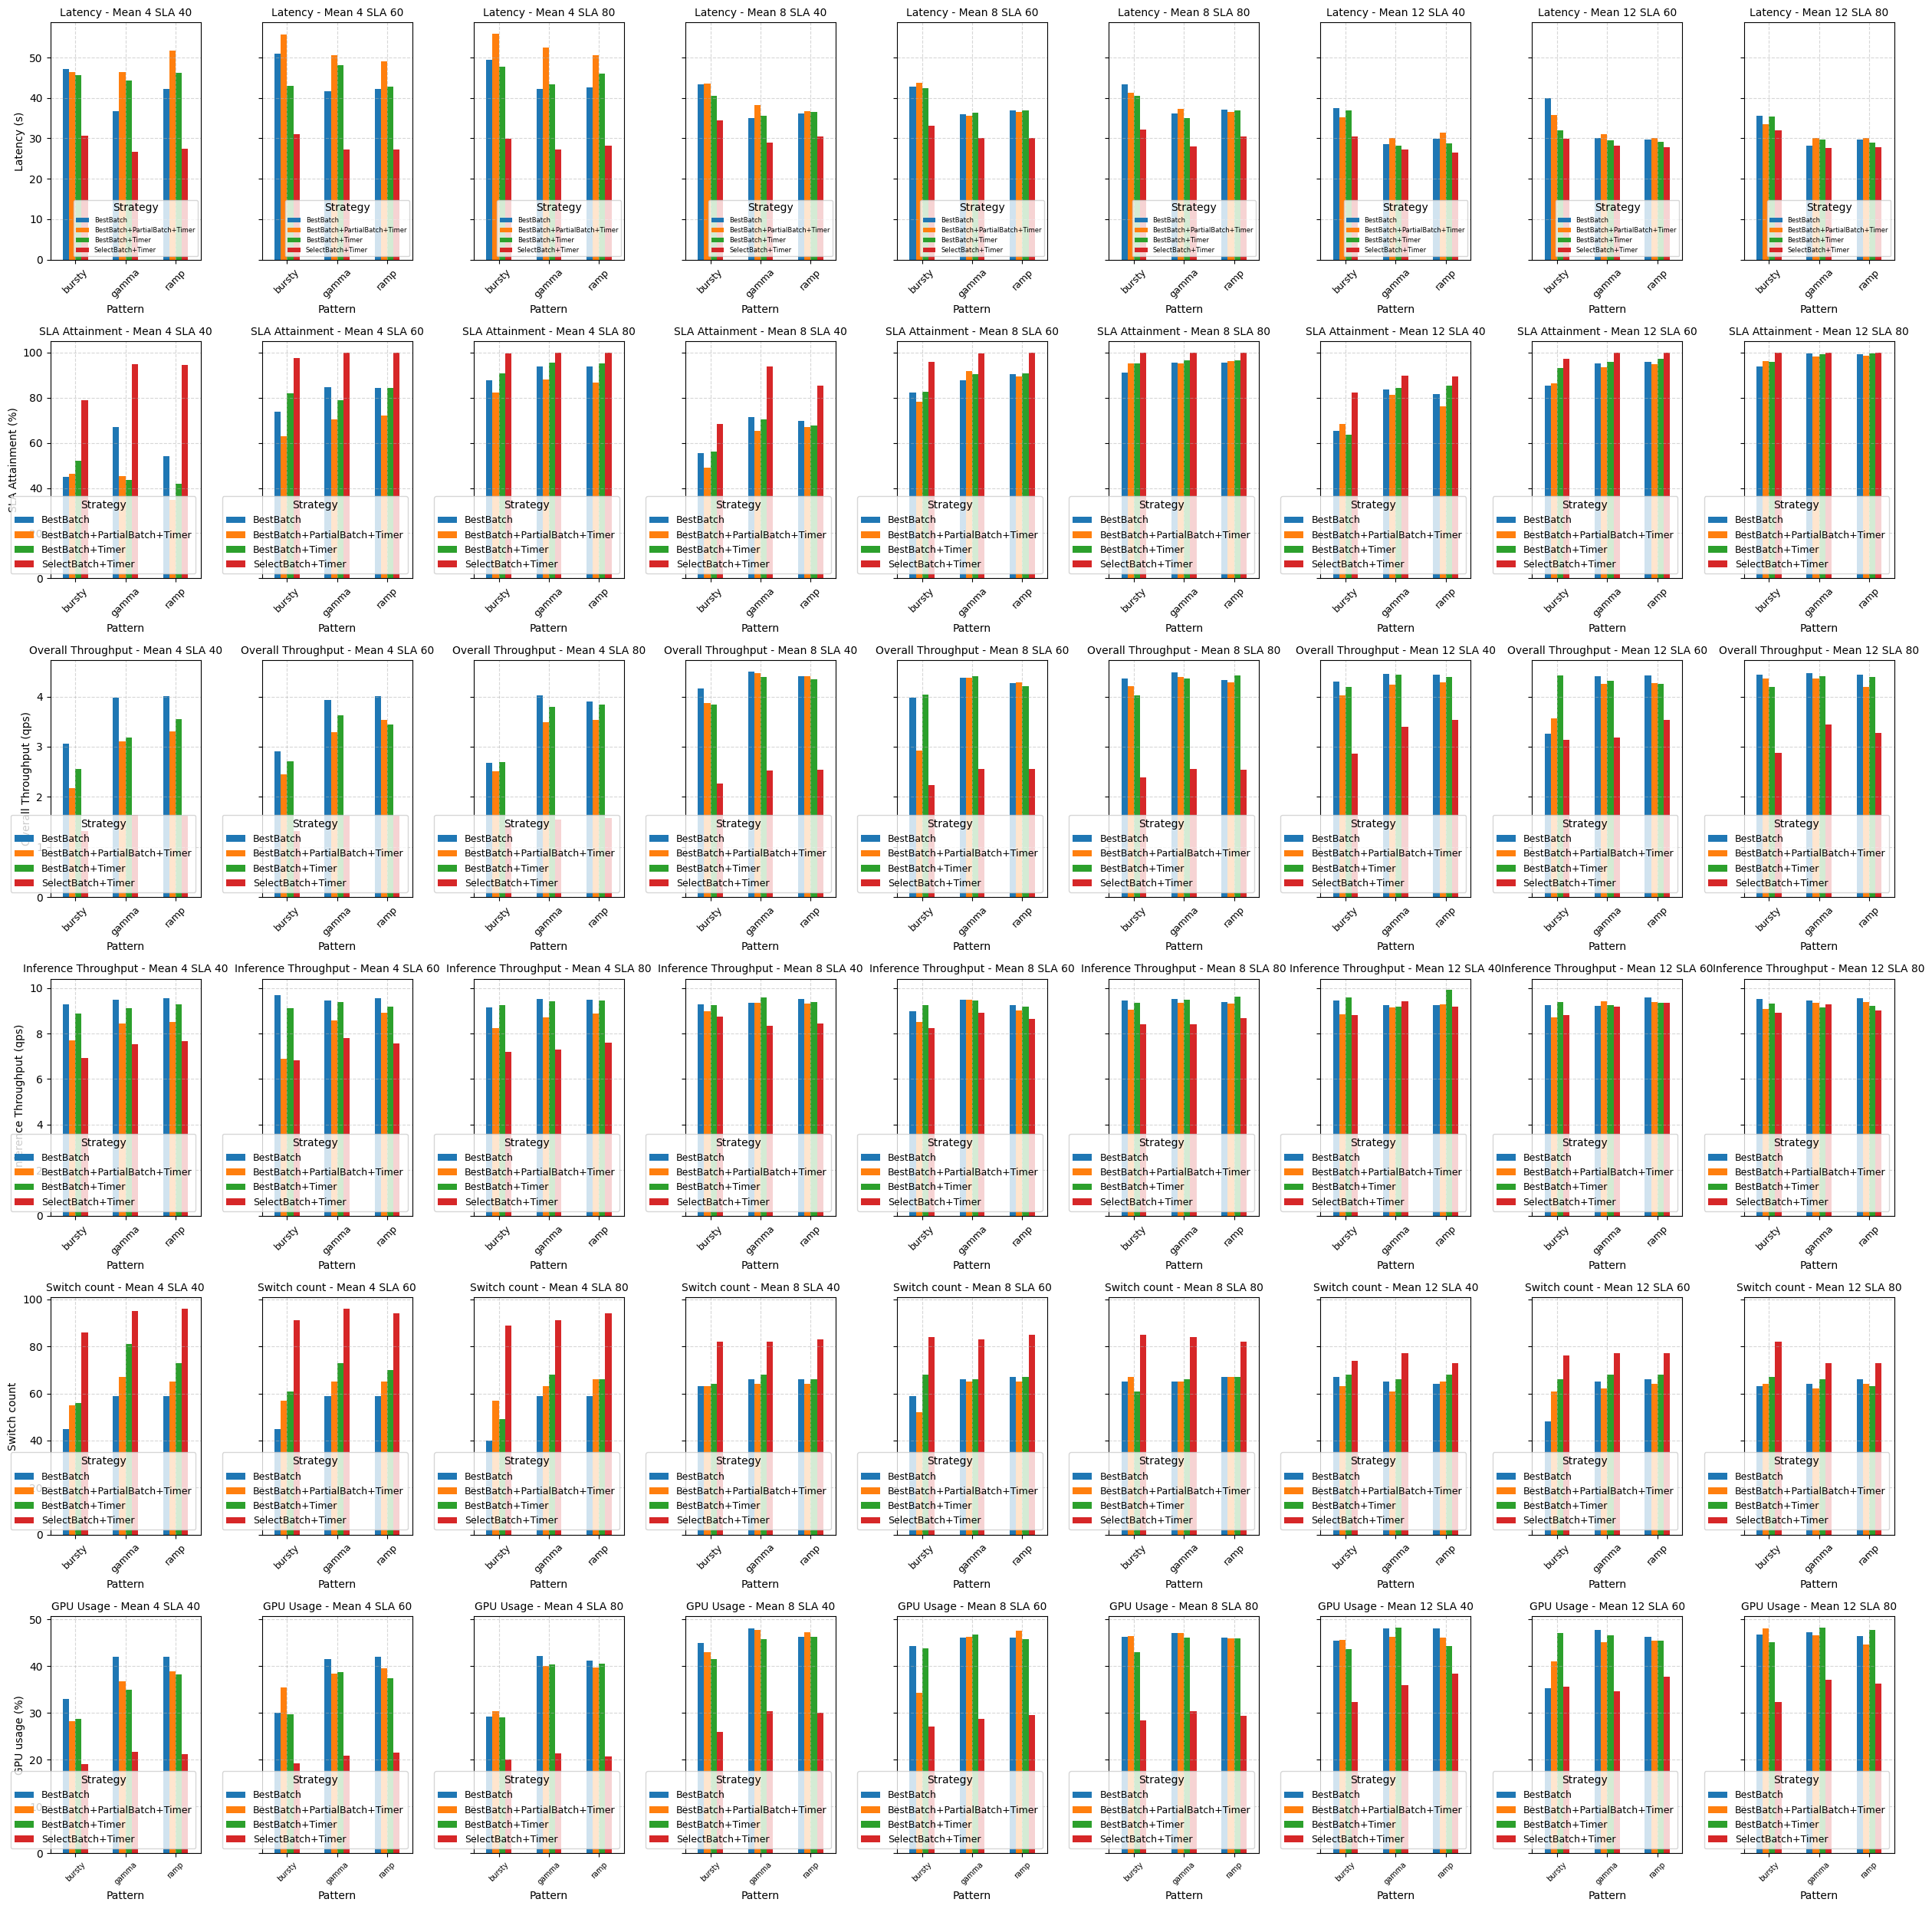

In [548]:
fig, ax = plt.subplots(figsize=(25, 25), nrows=6, ncols=9, sharey='row') 

# Create plots for each combination of input mean and time limit
for i, ((input_mean, time_limit), group) in enumerate(combined_df_noncc.groupby(['input_mean', 'time_limit'])):
    
    col = i % 9   # Determine the column index (either 0 or 1)
    
    # Pivot the data to have strategies and patterns side by side for Latency
    latency_pivot_data = group.pivot_table(values='latency (s)', index='pattern', columns='strategy', aggfunc='mean')
    latency_pivot_data.plot(kind='bar', ax=ax[0, col], legend=True)
    ax[0, col].set_title(f'Latency - Mean {input_mean} SLA {time_limit}', fontsize = 10)
    ax[0, col].set_xlabel('Pattern')
    ax[0, col].set_ylabel('Latency (s)')
    ax[0, col].tick_params(axis='x', rotation=45, labelsize=9)
    ax[0, col].legend(title='Strategy', loc="lower right", fontsize=6)
    ax[0, col].grid(alpha=0.5, linestyle="--")


    # Plot SLO attainment
    slo_attainment_pivot_data = group.pivot_table(values='SLO attainment', index='pattern', columns='strategy', aggfunc='mean')
    slo_attainment_pivot_data.plot(kind='bar', ax=ax[1, col], legend=True)
    ax[1, col].set_title(f'SLA Attainment - Mean {input_mean} SLA {time_limit}', fontsize = 10)
    ax[1, col].set_xlabel('Pattern')
    ax[1, col].set_ylabel('SLA Attainment (%)')
    ax[1, col].tick_params(axis='x', rotation=45, labelsize=9)
    ax[1, col].legend(title='Strategy', loc="lower right", fontsize=9)
    ax[1, col].grid(alpha=0.5, linestyle="--")

    # Plot overall throughput
    overall_throughput_pivot_data = group.pivot_table(values='overall_throughput', index='pattern', columns='strategy', aggfunc='mean')
    overall_throughput_pivot_data.plot(kind='bar', ax=ax[2, col], legend=True)
    ax[2, col].set_title(f'Overall Throughput - Mean {input_mean} SLA {time_limit}', fontsize = 10)
    ax[2, col].set_xlabel('Pattern')
    ax[2, col].set_ylabel('Overall Throughput (qps)')
    ax[2, col].tick_params(axis='x', rotation=45, labelsize=9)
    ax[2, col].legend(title='Strategy', loc="lower right", fontsize=9)
    ax[2, col].grid(alpha=0.5, linestyle="--")

    # Plot inference throughput
    inference_throughput_pivot_data = group.pivot_table(values='inference throughput', index='pattern', columns='strategy', aggfunc='mean')
    inference_throughput_pivot_data.plot(kind='bar', ax=ax[3, col], legend=True)
    ax[3, col].set_title(f'Inference Throughput - Mean {input_mean} SLA {time_limit}', fontsize = 10)
    ax[3, col].set_xlabel('Pattern')
    ax[3, col].set_ylabel('Inference Throughput (qps)')
    ax[3, col].tick_params(axis='x', rotation=45, labelsize=9)
    ax[3, col].legend(title='Strategy', loc="lower right", fontsize=9)
    ax[3, col].grid(alpha=0.5, linestyle="--")

    
    # Plot Switch count
    switch_count_pivot_data = group.pivot_table(values='switch_count', index='pattern', columns='strategy', aggfunc='mean')
    switch_count_pivot_data.plot(kind='bar', ax=ax[4, col], legend=True)
    ax[4, col].set_title(f'Switch count - Mean {input_mean} SLA {time_limit}', fontsize = 10)
    ax[4, col].set_xlabel('Pattern')
    ax[4, col].set_ylabel('Switch count')
    ax[4, col].tick_params(axis='x', rotation=45, labelsize=9)
    ax[4, col].legend(title='Strategy', loc="lower right", fontsize=9)
    ax[4, col].grid(alpha=0.5, linestyle="--")


    # Plot Switch count
    utilization_pivot_data = group.pivot_table(values='inference_percentage', index='pattern', columns='strategy', aggfunc='mean')
    utilization_pivot_data.plot(kind='bar', ax=ax[5, col], legend=True)
    ax[5, col].set_title(f'GPU Usage - Mean {input_mean} SLA {time_limit}', fontsize = 10)
    ax[5, col].set_xlabel('Pattern')
    ax[5, col].set_ylabel('GPU usage (%)')
    ax[5, col].tick_params(axis='x', rotation=45, labelsize=7)
    ax[5, col].legend(title='Strategy', loc="lower right", fontsize=9)
    ax[5, col].grid(alpha=0.5, linestyle="--")

    # Stop if more than the number of available subplots
    if i >= 15:  # We only have space for 5 rows x 2 columns
        break

fig.tight_layout()
plt.show()

## Other Stuff

In [239]:
path = "outputs/"
df_trafficmean2 = pd.read_csv(path+"measurements_results_red_cuda_SelectBatch+Timer_bursty_1200_mean4_20240926_122211.csv")
df_trafficmean5 = pd.read_csv(path+"measurements_results_red_cuda_SelectBatch+Timer_bursty_mean4_1200_20240926_131538.csv")
df_trafficmean8 = pd.read_csv(path+"measurements_results_red_cuda_SelectBatch+Timer_bursty_mean4_1200_20240926_140821.csv")

In [233]:
path = "outputs/"
df_trafficmean2 = pd.read_csv(path+"measurements_results_red_cuda_BestBatch+PartialBatch_bursty_900_20240925_133549.csv")
df_trafficmean5 = pd.read_csv(path+"measurements_results_red_cuda_BestBatch+PartialBatch_bursty_900_20240925_135210.csv")
df_trafficmean8 = pd.read_csv(path+"measurements_results_red_cuda_BestBatch+PartialBatch_bursty_900_20240925_140830.csv")

In [244]:
pd.DataFrame({'traffic mean req per sec': [2,5,8],
               'mean latency': [df_trafficmean2["latency (s)"].mean(), df_trafficmean5["latency (s)"].mean(), df_trafficmean8["latency (s)"].mean()],
               'throughput': [df_trafficmean2["throughput (qps)"].mean(), df_trafficmean5["throughput (qps)"].mean(), df_trafficmean8["throughput (qps)"].mean()],
               'overall throughput': [df_trafficmean2.shape[0]/1200, df_trafficmean5.shape[0]/1200, df_trafficmean8.shape[0]/1200],
               'processing time': [df_trafficmean2["processing time (s)"].mean(), df_trafficmean5["processing time (s)"].mean(), df_trafficmean8["processing time (s)"].mean()]
               })

,traffic mean req per sec,mean latency,throughput,overall throughput,processing time
0,2,47.691767,7.871960,1.033333,3.834203
1,5,51.622088,8.269095,1.122500,4.519139
2,8,45.044730,7.497538,1.125000,4.665184


In [242]:
df_trafficmean5["latency (s)"].mean()

np.float64(51.622087602078686)

In [235]:
# Read the CSV file without headers
df = pd.read_csv('gpu_utilization/gpu_usage_20240926_131556.csv', header=None, names=['Timestamp', 'Value'])
# Remove '%' and convert to float
df['Value'] = df['Value'].str.replace('%', '').astype(float)
# Calculate the mean
mean_value = df['Value'].mean()
print(f"GPU utilization: {mean_value}")

GPU utilization: 19.08153078202995


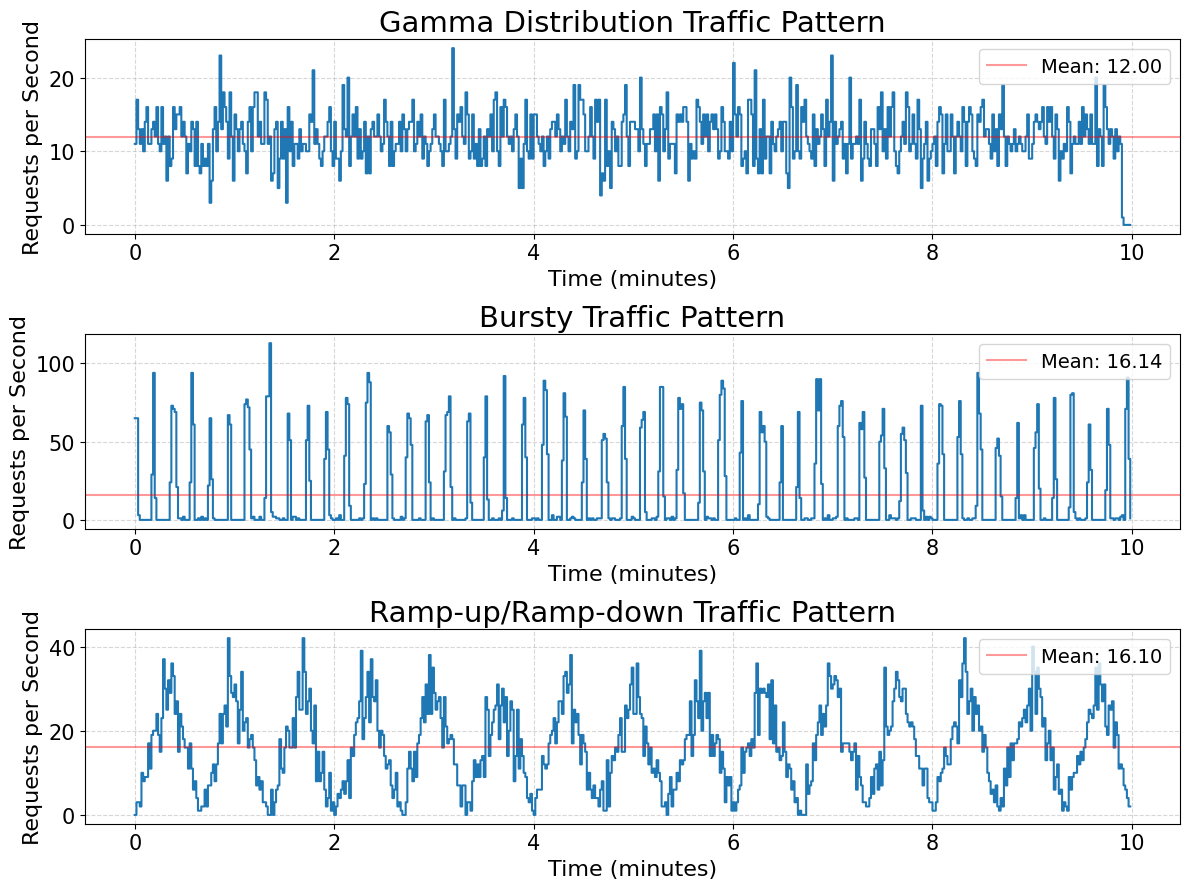

In [418]:
fig, ax = plt.subplots(figsize=(12, 9), nrows=3, ncols=1, sharey=False)

np.random.seed(42)
random.seed(42)

# Plot 1: Gamma Distribution Traffic Pattern
run_duration = 10 * 60  # Total time in seconds (e.g., 10 minutes)
rate = 12                # Average rate (requests per second)
shape = 1.0             # Shape parameter (alpha)
scale = 1 / rate        # Scale parameter (theta)

# Create time bins (e.g., per second)
time_bins = np.arange(0, run_duration + 1)
# Convert time bins to minutes for the x-axis
time_bins_minutes = time_bins / 60

# Generate inter-arrival times using Gamma distribution
inter_arrival_times = np.random.gamma(shape, scale, size=int(run_duration * rate))
arrival_times = np.cumsum(inter_arrival_times)
arrival_times = arrival_times[arrival_times <= run_duration]
request_counts, _ = np.histogram(arrival_times, bins=time_bins)
# Plot Gamma Distribution
gamma_mean = np.mean(request_counts)
ax[0].step(time_bins_minutes[:-1], request_counts, where='post')
ax[0].axhline(gamma_mean, color='r', linestyle='-', label=f'Mean: {gamma_mean:.2f}', alpha = 0.4)
ax[0].set_title('Gamma Distribution Traffic Pattern', fontsize=21)
ax[0].set_xlabel('Time (minutes)', fontsize = 16)
ax[0].set_ylabel('Requests per Second', fontsize = 16)
ax[0].grid(True, linestyle="--", alpha=0.5)
ax[0].legend(loc="upper right", fontsize=14)
ax[0].tick_params(axis='both', which='major', labelsize=15)

# Plot 2: Bursty Traffic Pattern (Updated)
arrival_times = []
current_time = 0
while current_time < run_duration:
    burst_duration = np.random.uniform(1, 4)
    burst_rate = np.random.uniform(60, 85)
    num_requests = int(burst_duration * burst_rate)
    inter_arrival_times = np.random.exponential(1 / burst_rate, size=num_requests) 
    if inter_arrival_times.size > 0:
        cumulative_times = current_time + np.cumsum(inter_arrival_times)
        arrival_times.extend(cumulative_times[cumulative_times <= current_time + burst_duration])
    current_time += burst_duration   
    idle_duration = np.random.uniform(8, 10)
    idle_rate = np.random.uniform(0, 1)
    num_requests = int(idle_duration * idle_rate)
    inter_arrival_times = np.random.exponential(1 / idle_rate, size=num_requests) if idle_rate > 0 else []
    if inter_arrival_times.size > 0:
        cumulative_times = current_time + np.cumsum(inter_arrival_times)
        arrival_times.extend(cumulative_times[cumulative_times <= current_time + idle_duration])   
    current_time += idle_duration
arrival_times = np.array(arrival_times)
request_counts, _ = np.histogram(arrival_times, bins=time_bins)
# Plot Bursty Traffic
bursty_mean = np.mean(request_counts)
ax[1].step(time_bins_minutes[:-1], request_counts, where='post')
ax[1].axhline(bursty_mean, color='r', linestyle='-', label=f'Mean: {bursty_mean:.2f}', alpha = 0.4)
ax[1].set_title('Bursty Traffic Pattern', fontsize = 21)
ax[1].set_xlabel('Time (minutes)', fontsize = 16)
ax[1].set_ylabel('Requests per Second', fontsize = 16)
ax[1].grid(True, linestyle="--", alpha=0.5)
ax[1].legend(loc="upper right", fontsize = 14)
ax[1].tick_params(axis='both', which='major', labelsize=15)


# Plot 3: Repeating Ramp-up/Ramp-down Traffic Pattern
min_rate = 1
max_rate = 32
ramp_up_duration = 20
ramp_down_duration = 20
cycle_duration = ramp_up_duration + ramp_down_duration
arrival_times = []
current_time = 0
while current_time < run_duration:
    time_in_cycle = (current_time % cycle_duration)
    if time_in_cycle < ramp_up_duration:
        current_rate = min_rate + (max_rate - min_rate) * (time_in_cycle / ramp_up_duration)
    else:
        time_in_ramp_down = time_in_cycle - ramp_up_duration
        current_rate = max_rate - (max_rate - min_rate) * (time_in_ramp_down / ramp_down_duration) 
    inter_arrival_time = np.random.exponential(1 / current_rate)
    current_time += inter_arrival_time
    if current_time <= run_duration:
        arrival_times.append(current_time)
arrival_times = np.array(arrival_times)
request_counts, _ = np.histogram(arrival_times, bins=time_bins)
# Plot Ramp-up/Ramp-down Traffic
ramp_mean = np.mean(request_counts)
ax[2].step(time_bins_minutes[:-1], request_counts, where='post')
ax[2].axhline(ramp_mean, color='r', linestyle='-', label=f'Mean: {ramp_mean:.2f}', alpha = 0.4)
ax[2].set_title('Ramp-up/Ramp-down Traffic Pattern', fontsize=21)
ax[2].set_xlabel('Time (minutes)', fontsize = 16)
ax[2].set_ylabel('Requests per Second', fontsize = 16)
ax[2].grid(True, linestyle="--", alpha=0.5)
ax[2].legend(loc="upper right", fontsize=14)
ax[2].tick_params(axis='both', which='major', labelsize=15)

plt.tight_layout()
#plt.savefig('readme_media/input_patterns.png', dpi=300)
plt.show()